# FIRST CODE
This is the vanilla coda that is executed without any additional layers other than Convolution. 

In this code, I'm using just, Conv2D, Max Pooling and 1x1. 

# Importing the required libraries and required modules


In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras.layers import Activation, Flatten, Add, BatchNormalization, Convolution2D, MaxPooling2D,Dropout
from keras.utils import np_utils

from keras.datasets import mnist

import cv2

import numpy as np
import matplotlib.pyplot as plt

### Loading the MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


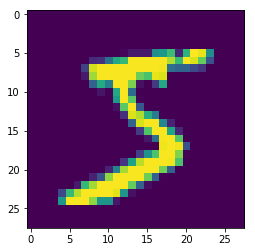

In [4]:
plt.imshow(x_train[0])

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # 28
model.add(Convolution2D(64, (3, 3), activation='relu')) # 26 
model.add(Convolution2D(32, 1, activation='relu')) # 26
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu')) # 9
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 32)          9248      
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0811 14:34:43.923436 140414239795072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 14:34:43.958455 140414239795072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=30, verbose=1, validation_data=(xtest, ytest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0811 14:34:44.727239 140414239795072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 14:34:44.828400 140414239795072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 31s 517us/step - loss: 0.1619 - acc: 0.9505 - val_loss: 0.0523 - val_acc: 0.9826
Epoch 2/30
60000/60000 [==============================] - 26s 426us/step - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0561 - val_acc: 0.9817
Epoch 3/30
60000/60000 [==============================] - 26s 427us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.0295 - val_acc: 0.9898
Epoch 4/30
60000/60000 [==============================] - 26s 426us/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0303 - val_acc: 0.9896
Epoch 5/30
60000/60000 [==============================] - 25s 424us/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0298 - val_acc: 0.9901
Epoch 6/30
60000/60000 [==============================] - 25s 423us/step - loss: 0.0217 - acc: 0.9929 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 25s 414us/step - loss: 0.0192 - acc: 0.9937 - val_loss: 0.

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [15]:
print(score)

[0.049034275156660374, 0.9912]


# SECOND CODE
In this code, there is addition of Batch Normalization and Introduction of Variations in the number of Parameters. So the three changes from the vanilla code are:


*  Addition of Batch Normalization
*  Changes in the number of channels
*   Changes in the batch size


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

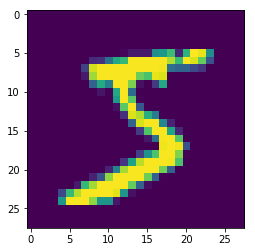

In [17]:

plt.imshow(x_train[0])

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)


In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [23]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 16)        272       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
model.fit(xtrain, ytrain, batch_size=128, nb_epoch=10, verbose=1, validation_data=(xtest, ytest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.5421 - acc: 0.9254 - val_loss: 0.2906 - val_acc: 0.9743
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1878 - acc: 0.9814 - val_loss: 0.1289 - val_acc: 0.9879
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1134 - acc: 0.9869 - val_loss: 0.0830 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0808 - acc: 0.9896 - val_loss: 0.0641 - val_acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0605 - acc: 0.9920 - val_loss: 0.0562 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0485 - acc: 0.9927 - val_loss: 0.0646 - val_acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0399 - acc: 0.9935 - val_loss: 0.0386 -

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [28]:
print(score)

[0.03798307363688946, 0.9901]


## Observations
In this network the number of parameters have reduced to around 15k and using 10 epochs 99.01% accuracy is achieved without overfitting. 

# THIRD CODE 
The three changes from the second code are:

* Addition of Dropout
* Change of Optimizer from adam to SGD
* Change in learning rate

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [43]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-pack

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_26 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 26, 26, 10)        170       
_________________________________________________________________
batch_normalization_23 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_27 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 10)        0         
__________

In [0]:

sgd = keras.optimizers.sgd(lr=0.001)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [46]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=30, verbose=1, validation_data=(xtest, ytest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 29s 484us/step - loss: 1.4590 - acc: 0.6264 - val_loss: 1.2470 - val_acc: 0.8294
Epoch 2/30
60000/60000 [==============================] - 27s 450us/step - loss: 0.8957 - acc: 0.8532 - val_loss: 0.9804 - val_acc: 0.8936
Epoch 3/30
60000/60000 [==============================] - 27s 452us/step - loss: 0.6968 - acc: 0.8898 - val_loss: 0.7915 - val_acc: 0.9205
Epoch 4/30
60000/60000 [==============================] - 27s 452us/step - loss: 0.5818 - acc: 0.9048 - val_loss: 0.6664 - val_acc: 0.9331
Epoch 5/30
60000/60000 [==============================] - 27s 451us/step - loss: 0.5031 - acc: 0.9149 - val_loss: 0.5675 - val_acc: 0.9409
Epoch 6/30
60000/60000 [==============================] - 27s 452us/step - loss: 0.4443 - acc: 0.9226 - val_loss: 0.4992 - val_acc: 0.9469
Epoch 7/30
60000/60000 [==============================] - 27s 450us/step - loss: 0.3989 - acc: 0.9290 - val_loss: 0.

In [47]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=10, verbose=1, validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  384/60000 [..............................] - ETA: 30s - loss: 0.1751 - acc: 0.9453

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 27s 450us/step - loss: 0.1588 - acc: 0.9634 - val_loss: 0.1201 - val_acc: 0.9799
Epoch 2/10
60000/60000 [==============================] - 27s 450us/step - loss: 0.1554 - acc: 0.9653 - val_loss: 0.1239 - val_acc: 0.9788
Epoch 3/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.1531 - acc: 0.9654 - val_loss: 0.1155 - val_acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.1472 - acc: 0.9666 - val_loss: 0.1112 - val_acc: 0.9809
Epoch 5/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.1445 - acc: 0.9684 - val_loss: 0.1129 - val_acc: 0.9799
Epoch 6/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.1413 - acc: 0.9678 - val_loss: 0.1074 - val_acc: 0.9810
Epoch 7/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.1429 - acc: 0.9677 - val_loss: 0.1026 - val_acc: 0.9814
Epoch 8/10
60000/60000 [==============

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [49]:
print(score)

[0.09861868968009949, 0.9817]


## Observations
* Number of parameters further reduced to 11k.
* The model did not overfit because of Dropout

# FOURTH CODE

The changes made here from the third code are:
* Add Dropout after every layer
* Add scheduler to change learning rate after every iteration.
* Introduce callbacks

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [56]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(14, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 7, 7))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7))`


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_34 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 26, 10)        170       
_________________________________________________________________
batch_normalization_30 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_35 (Activation)   (None, 26, 26, 10)        0         
__________

In [0]:
def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])

In [61]:

model.fit(xtrain, ytrain, batch_size=32, nb_epoch=30, verbose=1, validation_data=(xtest, ytest), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 39s 651us/step - loss: 0.4204 - acc: 0.8932 - val_loss: 0.1077 - val_acc: 0.9769
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 36s 601us/step - loss: 0.1810 - acc: 0.9516 - val_loss: 0.0677 - val_acc: 0.9832
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 36s 602us/step - loss: 0.1465 - acc: 0.9597 - val_loss: 0.0506 - val_acc: 0.9869
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 36s 598us/step - loss: 0.1244 - acc: 0.9646 - val_loss: 0.0407 - val_acc: 0.9894
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [63]:
print(score)

[0.023721380869857967, 0.9936]
